In [46]:
import os
import numpy as np
import random
import cv2
import operator
from environment import City, Person
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import shelve

%matplotlib inline
jtplot.style('monokai')

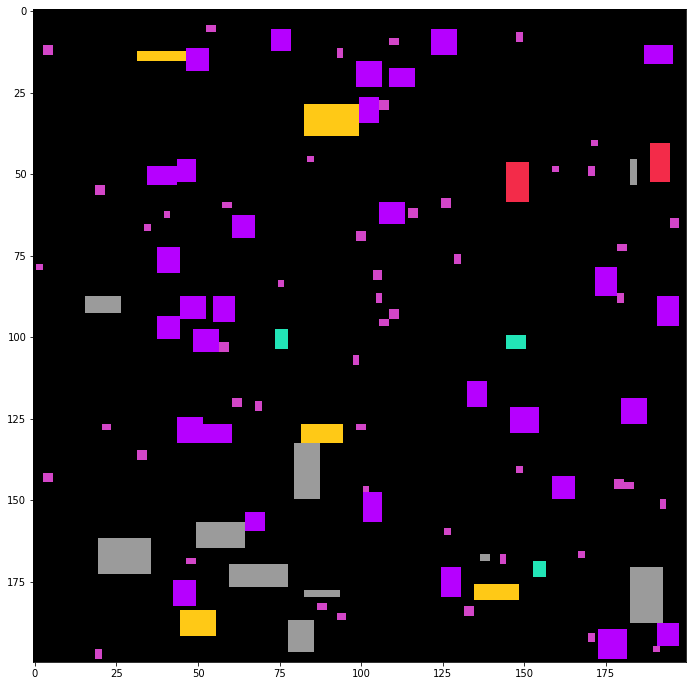

In [2]:
city = City(
        200,
        100,
        school=3,
        office=5,
        hospital=2,
        apartment=30,
        smallhouse=50,
        public_places=10,
    )
city._spawn_buildings()
city.draw_city((12, 12))

In [ ]:
persons = []

In [20]:
person1 = city.spawn_person()
person2 = city.spawn_person()
person3 = city.spawn_person()
print("Person1 Details")
print("---------------")
person1.about(details=True)
print("Person2 Details")
print("---------------")
person2.about(details=True)
print("Person3 Details")
print("---------------")
person3.about(details=True)

Person1 Details
---------------
Name: Angelica
Age: 49
Occupation: FieldJob
Work Location: [(102, 72), (120, 104), (70, 5), (13, 102), (109, 179), (36, 1), (6, 93)]
Stays at: (69, 100)
Immunity: 0.4237457678490625
Hygiene: 0.3671487599386183
Infected: False
Person2 Details
---------------
Name: Robert
Age: 30
Occupation: FieldJob
Work Location: [(47, 195), (141, 188), (159, 192), (26, 169), (177, 117), (197, 149), (22, 175)]
Stays at: (194, 177)
Immunity: 0.1
Hygiene: 0.1
Infected: False
Person3 Details
---------------
Name: Robert
Age: 18
Occupation: Student
Work Location: [(172, 155)]
Stays at: (12, 4)
Immunity: 0.2629686821432535
Hygiene: 0.9
Infected: False


In [17]:
def square(pos, l):
    min_ = max(pos[1] - l, 0), max(pos[0] - l, 0)
    max_ = pos[1] + l, pos[0] + l
    return min_, max_

In [21]:
citymap = city.rgb_grid.copy()
for time in range(8, 24):
    current_pos1 = person1.step(time)
    current_pos2 = person2.step(time)
    current_pos3 = person3.step(time)
    
    x1, x2 = square(current_pos1, 2)
    y1, y2 = square(current_pos2, 2)
    z1, z2 = square(current_pos3, 2)
    
    cv2.rectangle(citymap, x1, x2, (0, 255, 0), 1)
    cv2.rectangle(citymap, y1, y2, (255, 255, 0), 1)
    cv2.rectangle(citymap, z1, z2, (255, 255, 255), 1)
    
    
#     cv2.circle(citymap, current_pos1, 5, (0, 255, 0), 1)
#     cv2.circle(citymap, current_pos2, 5, (0, 0, 255), 1)
#     cv2.circle(citymap, current_pos3, 5, (255, 255, 255), 1)
    
#    print(f"time:{time} Hrs. --> location:{current_pos2}")

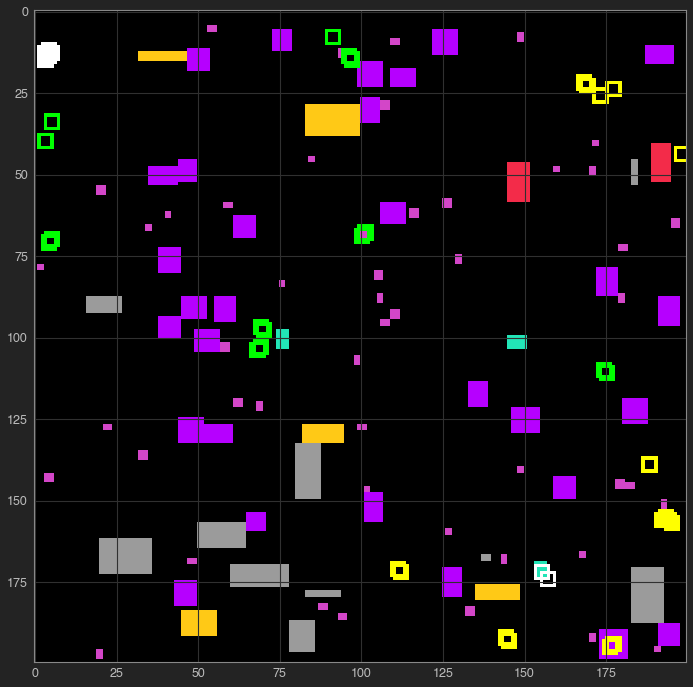

In [22]:
plt.figure(figsize = (12, 12))
plt.imshow(citymap)
plt.show()

In [31]:
locs = [(1,2), (0, 1), (3, 4), (1, 2), (0, 1), (4, 4), (3, 2), (2, 1)]
infected =[0] * len(locs)
infected[0] = 1
infected[1] = 1

In [38]:
np.where(np.array(infected) > 0)

(array([0, 1]),)

In [30]:
ss = np.array(locs)

In [41]:
ss

array([[1, 2],
       [0, 1],
       [3, 4],
       [1, 2],
       [0, 1],
       [4, 4],
       [3, 2],
       [2, 1]])

In [45]:
np.where(ss == np.array([[1, 2]]))

(array([0, 0, 3, 3, 6]), array([0, 1, 0, 1, 1]))